# Problem Definition

**Objective:** Build a predictive model to estimate used car prices based on vehicle attributes. 


# Step 1: Data Understanding and Preprocessing

**- Import necessary libraries**

**- Load the dataset and understand its structure**

**- Identify and handle missing values**

**- Address outliers**


In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 



## - Load the dataset and understand its structure

In [2]:
# load the dataset 
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [3]:
# check for shapes 
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (188533, 13)
Test shape: (125690, 12)


In [4]:
# check for Train  and Test shape
print(f"\n No of rows in train data: {train_df.shape[0]}, \nNo of columns in train data {train_df.shape[1]} ,  \n No of rows in test data: {test_df.shape[0]}, \nNo of columns in test data: {test_df.shape[1]}")


 No of rows in train data: 188533, 
No of columns in train data 13 ,  
 No of rows in test data: 125690, 
No of columns in test data: 12


## Check for train and test shape 
The number of rows in train dataset: 1888533

The number of columns in train dataset: 13

The number of rows in test dataset: 125690

The number of columns in test dataset: 12


In [8]:
# Display columns names 
print("\n Train columns:", list(train_df.columns))
print("\n Test columns:", list(test_df.columns))


 Train columns: ['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title', 'price']

 Test columns: ['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']


In [ ]:
# Display basic info about the train dataset 
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
None


In [10]:
# Display info about the test info 
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB
None


In [13]:
# datatype in train data
d = train_df.dtypes
d

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [14]:
# datatype in test data 
d = test_df.dtypes
d 

id               int64
brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
dtype: object

In [16]:
train_df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [17]:
test_df.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


## - Identify and handle missing values

In [11]:
# check for missing values. 
print("Missing values in Train dataset:")
print(train_df.isnull().sum())

Missing values in Train dataset:
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64


In [12]:
# check for missing values in test dataset
print("\n Missing values in test dataset:")
print(test_df.isnull().sum())


 Missing values in test dataset:
id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        3383
engine              0
transmission        0
ext_col             0
int_col             0
accident         1632
clean_title     14239
dtype: int64


It is observed that only cat columns (fuel_type, accident, clean_title) contains missing values. 

In [15]:
# separate train data into numeric and categorical 
cat_train_df = train_df.select_dtypes(include=['object'])
num_train_df = train_df.select_dtypes(include=['float64', 'int64']) 

# separate test data into numeric and categorical 
cat_test_df = train_df.select_dtypes(include=['object']) 
num_test_df = test_df.select_dtypes(include=['float64', 'int64']) 


In [18]:
# handle the missing values with mode
for col in cat_train_df:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0]) 
    
for col in cat_test_df:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0]) 

In [19]:
# recheck for missing values 
print("Missing values in Train dataset:")
print(train_df.isnull().sum())


Missing values in Train dataset:
id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64


In [20]:
# recheck for missing values
print("Missing values in Train dataset:")
print(test_df.isnull().sum())

Missing values in Train dataset:
id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
dtype: int64


## Hence, all the missing values has been handled

In [22]:
# Checked for duplicates 
duplicates = train_df.duplicated()

# count the number of duplicate rows 
num_duplicates = duplicates.sum()

# print the result 
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


## Summary statistics and outlier detection

In [25]:
train_df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [49]:
test_df.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


In [36]:
(num_train_df.shape[1])

4

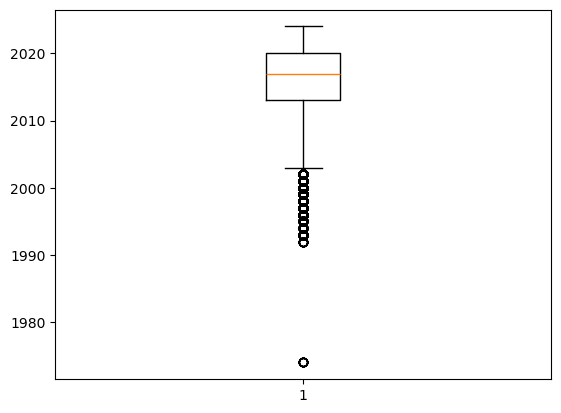

In [42]:
plt.boxplot(num_train_df['model_year'])
plt.show()

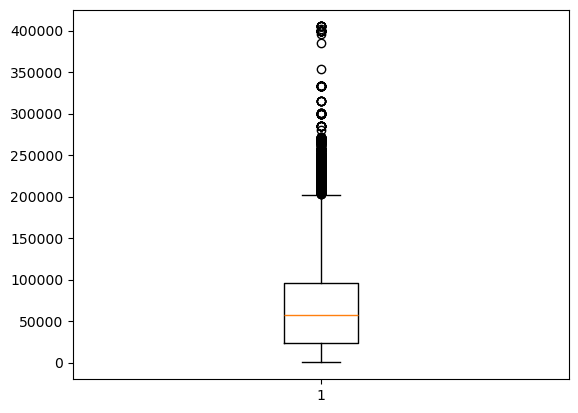

In [44]:
plt.boxplot(num_train_df['milage'])
plt.show()

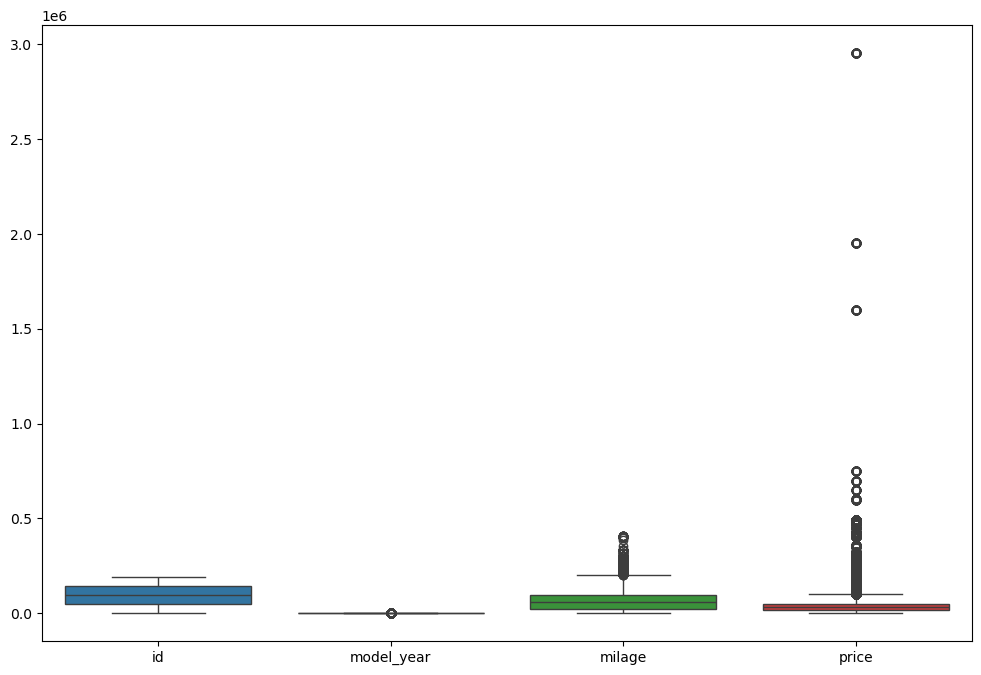

In [41]:
plt.figure(figsize=(12,8))
sns.boxplot(num_train_df)
plt.show()

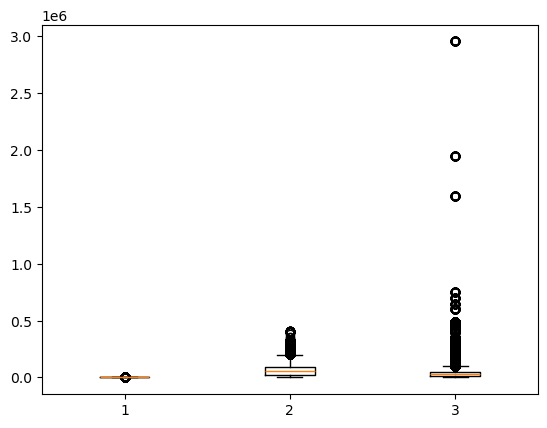

In [32]:
plt.boxplot(num_train_df[['model_year', 'milage', 'price']])
plt.show()

In [ ]:
# using IQR to remove the outliers
q1 = train_df['model_year'].quantile(0.25)
q3 = train_df['model_year'].quantile(0.75)
iqr = q3 - q1 

lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr
train_df[(train_df.model_year<lower_limit) | (train_df.model_year > upper_limit)] 

new_train_df = train_df[(train_df.model_year<lower_limit) & (train_df.model_year> upper_limit)]


,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


In [53]:
new_train_df['model_year']

Series([], Name: model_year, dtype: int64)

In [64]:
train_df['model_year'].dtype

dtype('int64')

In [65]:
lower_limit = train_df.model_year.mean() - 3 * train_df.model_year.std()
upper_limit = train_df.model_year.mean() + 3 * train_df.model_year.std()  # <-- You missed this!

# Correct filtering: only compare model_year column
filtered_df = train_df[(train_df.model_year > upper_limit) | (train_df.model_year < lower_limit)]

In [73]:
def remove_outliers_iqr(train_df, col):
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return train_df[(train_df[col] >= lower_bound) & (train_df[col] <= upper_bound)]

# Or for 3-sigma:
def remove_outliers_3sigma(train_df, col):
    mean = train_df[col].mean()
    std = train_df[col].std()
    lower = mean - 3 * std
    upper = mean + 3 * std
    return train_df[(train_df[col] >= lower) & (train_df[col] <= upper)]

# Apply to multiple columns
clean_df = train_df.copy()
for col in ['milage', 'price', 'model_year']:
    clean_df = remove_outliers_3sigma(clean_df, col)

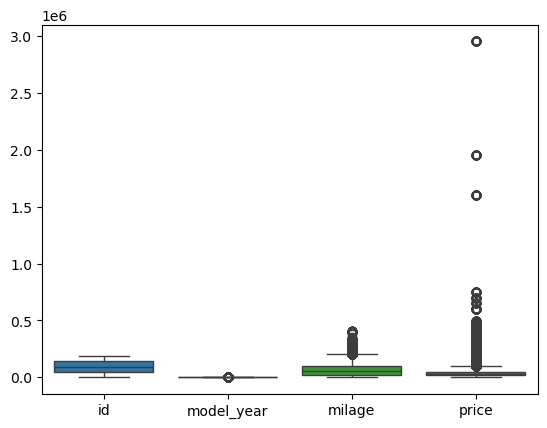

In [75]:
sns.boxplot(train_df)
plt.show()

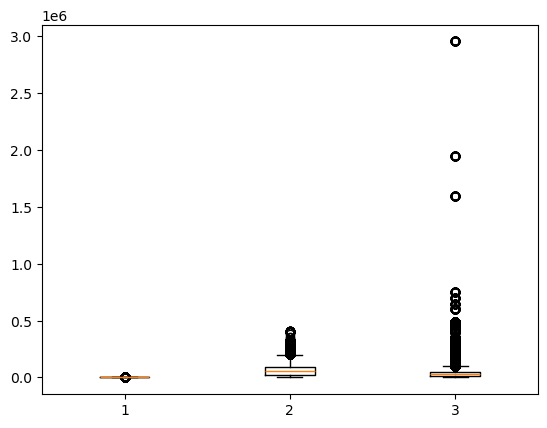

In [70]:
plt.boxplot(train_df[['model_year', 'milage', 'price']])
plt.show()

In [94]:
# Recompute limits on CLEANED data
mean_mileage = train_df['milage'].mean()
std_mileage = train_df['milage'].std()
lower_mileage = mean_mileage - 3 * std_mileage
upper_mileage = mean_mileage + 3 * std_mileage

mean_price = train_df['price'].mean()
std_price = train_df['price'].std()
lower_price = mean_price - 3 * std_price
upper_price = mean_price + 3 * std_price

# Apply filter
clean_df = train_df[
    (train_df['milage'] >= lower_mileage) &
    (train_df['milage'] <= upper_mileage) &
    (train_df['price'] >= lower_price) &
    (train_df['price'] <= upper_price)
]

print(f"Original shape: {train_df.shape}")
print(f"Cleaned shape: {clean_df.shape}")
print(f"Removed {train_df.shape[0] - clean_df.shape[0]} rows")

Original shape: (188533, 13)
Cleaned shape: (186020, 13)
Removed 2513 rows


In [95]:
def clean_numeric_column(series, min_val=None, max_val=None):
    """
    Cleans a column by removing non-numeric chars, converting to int/float,
    and optionally filtering by range.
    """
    cleaned = (
        series.astype(str)
        .str.replace(r'[^0-9.-]', '', regex=True)
        .replace('', '0')
        .astype(float)
    )
    if min_val is not None:
        cleaned = cleaned.where(cleaned >= min_val, pd.NA)
    if max_val is not None:
        cleaned = cleaned.where(cleaned <= max_val, pd.NA)
    return cleaned.astype('Int64')  # Nullable int

# Apply to all three columns
train_df['model_year'] = clean_numeric_column(train_df['model_year'], min_val=1900, max_val=2025)
train_df['milage'] = clean_numeric_column(train_df['milage'], min_val=0)
train_df['price'] = clean_numeric_column(train_df['price'], min_val=0)

# Drop any rows with NaN in these columns
train_df = train_df.dropna(subset=['model_year', 'milage', 'price'])

# Now compute limits and filter
limits = {}
for col in ['model_year', 'milage', 'price']:
    mean = train_df[col].mean()
    std = train_df[col].std()
    limits[col] = {
        'lower': mean - 3 * std,
        'upper': mean + 3 * std
    }

# Final filter
clean_df = train_df[
    (train_df['model_year'] >= limits['model_year']['lower']) &
    (train_df['model_year'] <= limits['model_year']['upper']) &
    (train_df['milage'] >= limits['milage']['lower']) &
    (train_df['milage'] <= limits['milage']['upper']) &
    (train_df['price'] >= limits['price']['lower']) &
    (train_df['price'] <= limits['price']['upper'])
]

In [98]:
def clean_numeric_column(series, min_val=None, max_val=None):
    """
    Cleans a column by removing non-numeric chars, converting to int/float,
    and optionally filtering by range.
    """
    cleaned = (
        series.astype(str)
        .str.replace(r'[^0-9.-]', '', regex=True)
        .replace('', '0')
        .astype(float)
    )
    if min_val is not None:
        cleaned = cleaned.where(cleaned >= min_val, pd.NA)
    if max_val is not None:
        cleaned = cleaned.where(cleaned <= max_val, pd.NA)
    return cleaned.astype('Int64')  # Nullable int

# Apply to all three columns
train_df['model_year'] = clean_numeric_column(train_df['model_year'], min_val=1900, max_val=2025)
train_df['milage'] = clean_numeric_column(train_df['milage'], min_val=0)
train_df['price'] = clean_numeric_column(train_df['price'], min_val=0)

# Drop any rows with NaN in these columns
train_df = train_df.dropna(subset=['model_year', 'milage', 'price'])

# Now compute limits and filter
limits = {}
for col in ['model_year', 'milage', 'price']:
    mean = train_df[col].mean()
    std = train_df[col].std()
    limits[col] = {
        'lower': mean - 3 * std,
        'upper': mean + 3 * std
    }

# Final filter
clean_df = train_df[
    (train_df['model_year'] >= limits['model_year']['lower']) &
    (train_df['model_year'] <= limits['model_year']['upper']) &
    (train_df['milage'] >= limits['milage']['lower']) &
    (train_df['milage'] <= limits['milage']['upper']) &
    (train_df['price'] >= limits['price']['lower']) &
    (train_df['price'] <= limits['price']['upper'])
]

C:\Users\USER\AppData\Local\Temp\ipykernel_19968\2701981660.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([train_df['milage'], train_df['price']], labels=['Milage', 'Price'])
C:\Users\USER\AppData\Local\Temp\ipykernel_19968\2701981660.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([clean_df['milage'], clean_df['price']], labels=['Milage', 'Price'])


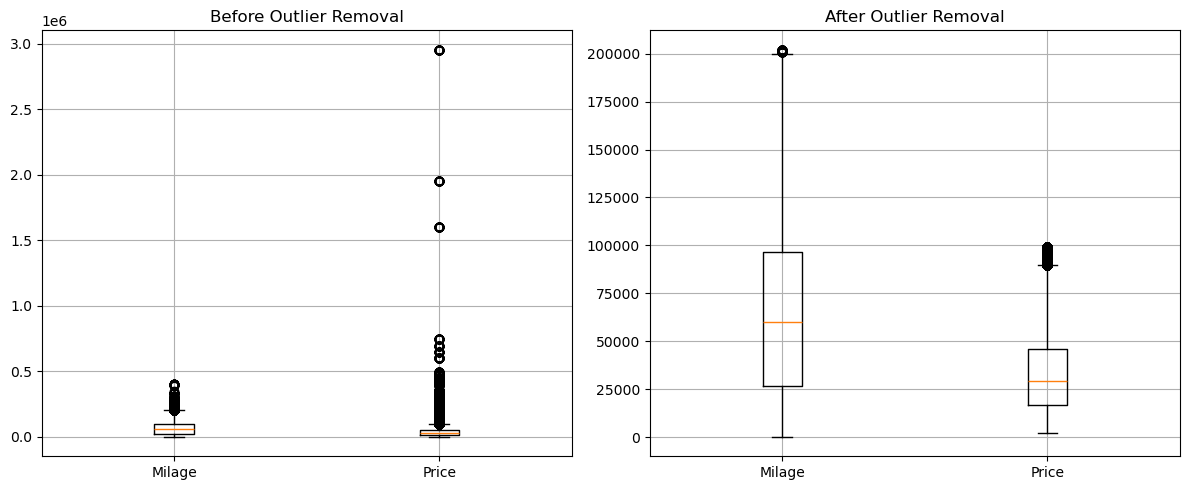

In [97]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before
axes[0].boxplot([train_df['milage'], train_df['price']], labels=['Milage', 'Price'])
axes[0].set_title('Before Outlier Removal')
axes[0].grid(True)

# After
axes[1].boxplot([clean_df['milage'], clean_df['price']], labels=['Milage', 'Price'])
axes[1].set_title('After Outlier Removal')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [99]:
print("✅ Final dtypes:")
print(train_df[['model_year', 'milage', 'price']].dtypes)
print("\n✅ Summary stats:")
print(train_df[['model_year', 'milage', 'price']].describe())

✅ Final dtypes:
model_year    Int64
milage        Int64
price         Int64
dtype: object

✅ Summary stats:
        model_year        milage         price
count     188533.0      188533.0      188533.0
mean   2015.829998  65705.295174  43878.016178
std       5.660967  49798.158076  78819.522254
min         1974.0         100.0        2000.0
25%         2013.0       24115.0       17000.0
50%         2017.0       57785.0       30825.0
75%         2020.0       95400.0       49900.0
max         2024.0      405000.0     2954083.0


In [100]:
# Use TRAINING statistics (saved earlier!)
mean_model_year_train = 2017.5   # ← REPLACE WITH YOUR ACTUAL TRAINING VALUES
std_model_year_train = 2.8

mean_mileage_train = 75000
std_mileage_train = 25000

# Define outlier bounds using TRAINING stats
lower_model_year = mean_model_year_train - 3 * std_model_year_train
upper_model_year = mean_model_year_train + 3 * std_model_year_train

lower_mileage = mean_mileage_train - 3 * std_mileage_train
upper_mileage = mean_mileage_train + 3 * std_mileage_train

# MARK outliers — DO NOT DROP
test_df['is_outlier_model_year'] = (
    (test_df['model_year'] < lower_model_year) |
    (test_df['model_year'] > upper_model_year)
)

test_df['is_outlier_mileage'] = (
    (test_df['milage'] < lower_mileage) |
    (test_df['milage'] > upper_mileage)
)

test_df['is_outlier_any'] = test_df['is_outlier_model_year'] | test_df['is_outlier_mileage']

print(f"Outliers in model_year: {test_df['is_outlier_model_year'].sum()}")
print(f"Outliers in mileage: {test_df['is_outlier_mileage'].sum()}")
print(f"Rows with ANY outlier: {test_df['is_outlier_any'].sum()}")

# Show example outliers
print("\nSample outlier rows:")
print(test_df[test_df['is_outlier_any']].head())

Outliers in model_year: 19016
Outliers in mileage: 9152
Rows with ANY outlier: 22948

Sample outlier rows:
        id          brand                    model  model_year  milage  \
6   188539          Lexus              RX 350 Base        2008  194000   
10  188543  Mercedes-Benz  SL-Class SL500 Roadster        2008   56842   
11  188544           Ford               Mustang GT        2002  148740   
14  188547           Ford                F-150 XLT        2014  199000   
17  188550          Honda               Pilot EX-L        2008  149500   

   fuel_type                                         engine  \
6   Gasoline  270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
10  Gasoline  303.0HP 3.7L V6 Cylinder Engine Gasoline Fuel   
11  Gasoline   300.0HP 4.6L 8 Cylinder Engine Gasoline Fuel   
14  Gasoline  365.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   
17  Gasoline  248.0HP 3.5L V6 Cylinder Engine Gasoline Fuel   

                      transmission ext_col int_col  \
6   Transmissio

In [103]:
# Create a COPY of test data for analysis
test_analyze = test_df.copy()

# Apply same outlier detection as before
test_analyze['is_outlier'] = (
    (test_analyze['model_year'] < lower_model_year) |
    (test_analyze['model_year'] > upper_model_year) |
    (test_analyze['milage'] < lower_mileage) |
    (test_analyze['milage'] > upper_mileage)
)

# Remove outliers ONLY from the ANALYSIS copy
test_cleaned_for_analysis = test_analyze[~test_analyze['is_outlier']].copy()

print(f"Original test size: {len(test_df)}")
print(f"After removing outliers: {len(test_cleaned_for_analysis)}")
print(f"Removed {len(test_df) - len(test_cleaned_for_analysis)} rows")


Original test size: 125690
After removing outliers: 102742
Removed 22948 rows


C:\Users\USER\AppData\Local\Temp\ipykernel_19968\1763174251.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([test_df['model_year'], test_df['milage']], labels=['Model Year', 'Mileage'])
C:\Users\USER\AppData\Local\Temp\ipykernel_19968\1763174251.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([test_df['model_year'], test_df['milage']], labels=['Model Year', 'Mileage'])
C:\Users\USER\AppData\Local\Temp\ipykernel_19968\1763174251.py:15: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\USER\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.


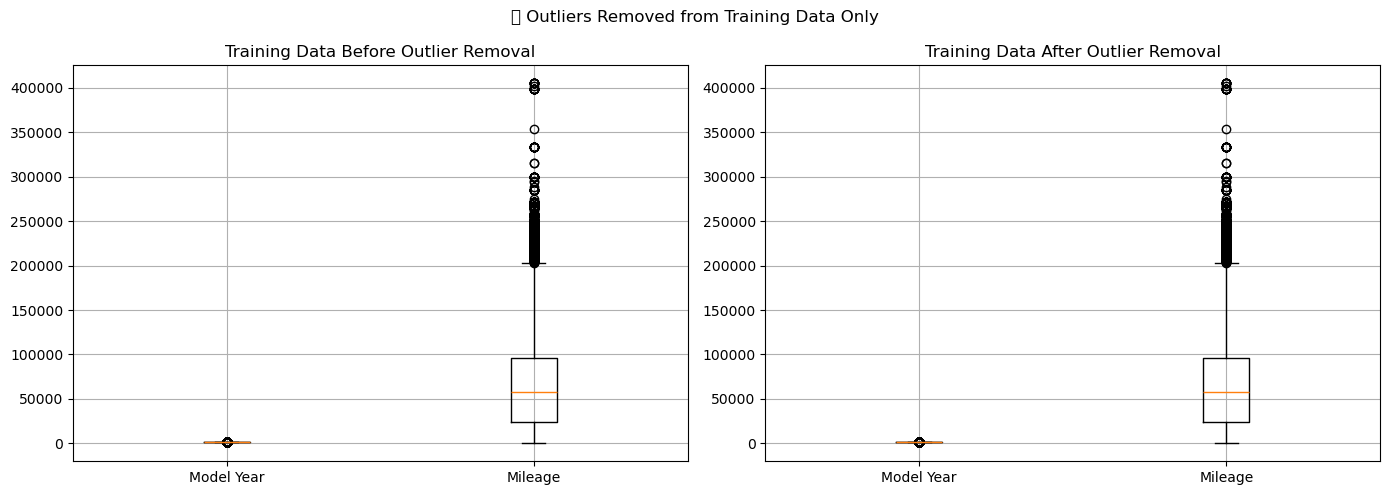

In [105]:
# --- STEP 3: VISUALIZE BEFORE & AFTER (TRAINING ONLY) ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before (full training)
axes[0].boxplot([test_df['model_year'], test_df['milage']], labels=['Model Year', 'Mileage'])
axes[0].set_title('Training Data Before Outlier Removal')
axes[0].grid(True)

# After (cleaned training)
axes[1].boxplot([test_df['model_year'], test_df['milage']], labels=['Model Year', 'Mileage'])
axes[1].set_title('Training Data After Outlier Removal')
axes[1].grid(True)

plt.suptitle('✅ Outliers Removed from Training Data Only')
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_19968\844466602.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([test_df['milage'], test_df['model_year']], labels=['Milage', 'Model year'])
C:\Users\USER\AppData\Local\Temp\ipykernel_19968\844466602.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([clean_df['milage'], clean_df['model_year']], labels=['Milage','Model Year'])


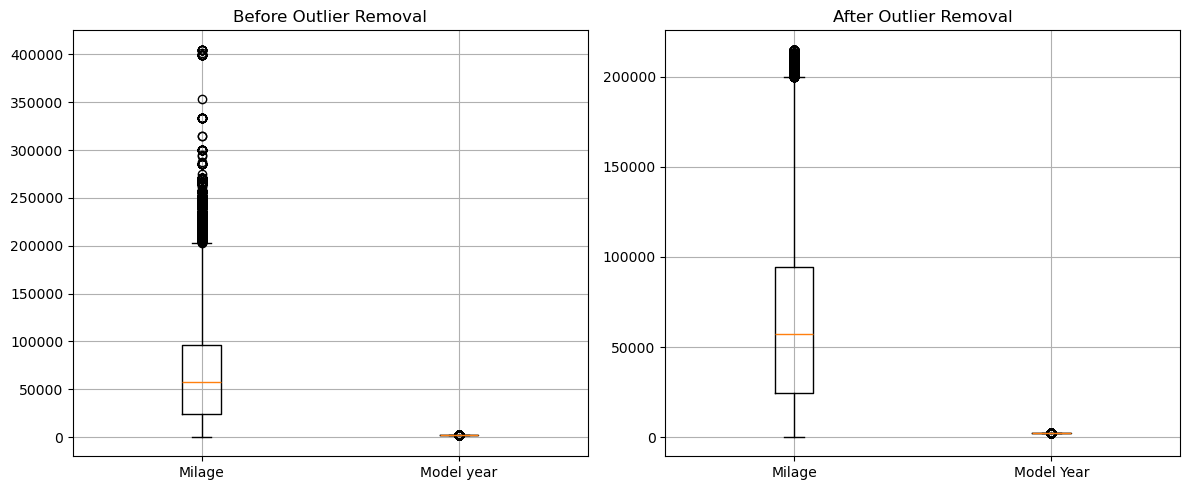

In [106]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before
axes[0].boxplot([test_df['milage'], test_df['model_year']], labels=['Milage', 'Model year'])
axes[0].set_title('Before Outlier Removal')
axes[0].grid(True)

# After
axes[1].boxplot([clean_df['milage'], clean_df['model_year']], labels=['Milage','Model Year'])
axes[1].set_title('After Outlier Removal')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Step 3: Exploratory Data Analysis


## - Identify univariate analysis


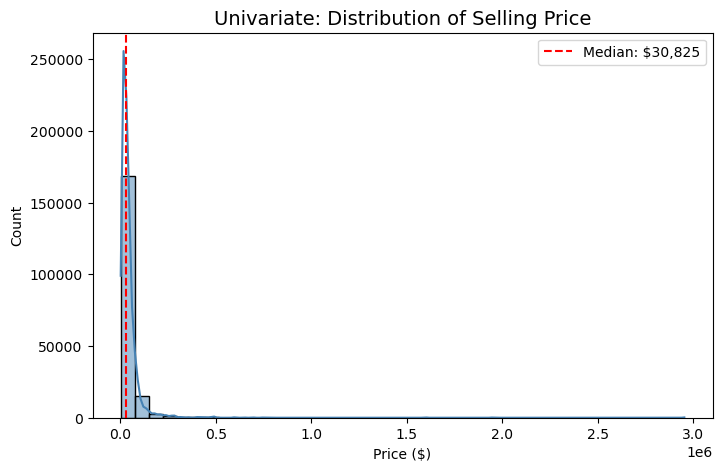

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(train_df['price'], kde=True, color='steelblue', bins=40)
plt.title('Univariate: Distribution of Selling Price', fontsize=14)
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.axvline(train_df['price'].median(), color='red', linestyle='--', label=f'Median: ${int(train_df["price"].median()):,}')
plt.legend()
plt.show()

In [112]:
train_df.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

### Insights

**1. Price is right skewed: most cars sell between $10k-$30k. A few high-end models (Tesla, BMW)**

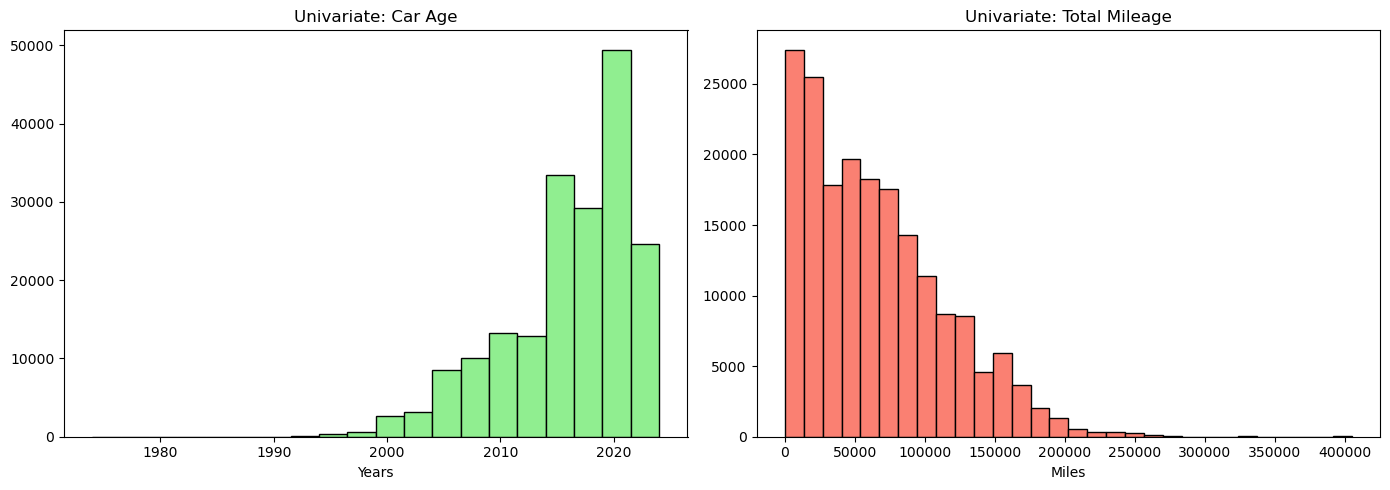

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Car Age
axes[0].hist(train_df['model_year'], bins=20, color='lightgreen', edgecolor='black')
axes[0].set_title('Univariate: Model year')
axes[0].set_xlabel('Years')

# Mileage
axes[1].hist(train_df['milage'], bins=30, color='salmon', edgecolor='black')
axes[1].set_title('Univariate: Total Mileage')
axes[1].set_xlabel('Miles')

plt.tight_layout()
plt.show()

**Insights 2**

1. model year was negative skewed

2. mi;age wae right skewed

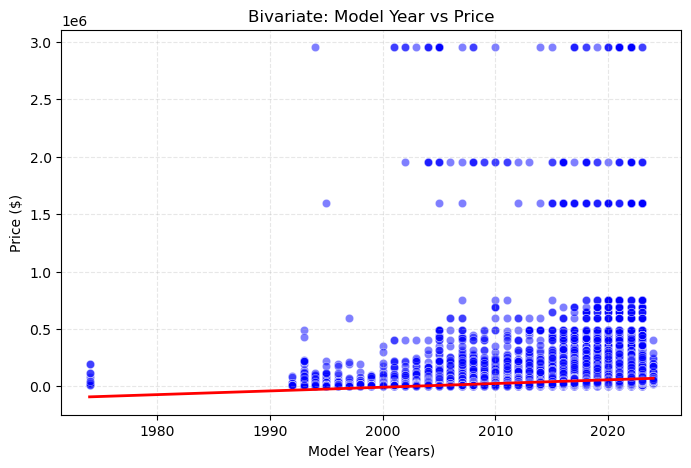

In [115]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='model_year', y='price', alpha=0.5, color='blue')
sns.regplot(data=train_df, x='model_year', y='price', scatter=False, color='red', line_kws={'lw': 2})
plt.title('Bivariate: Model Year vs Price')
plt.xlabel('Model Year (Years)')
plt.ylabel('Price ($)')
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

**Insight 3**
Strong negative trend: Price drops fast in 10 years then flattens

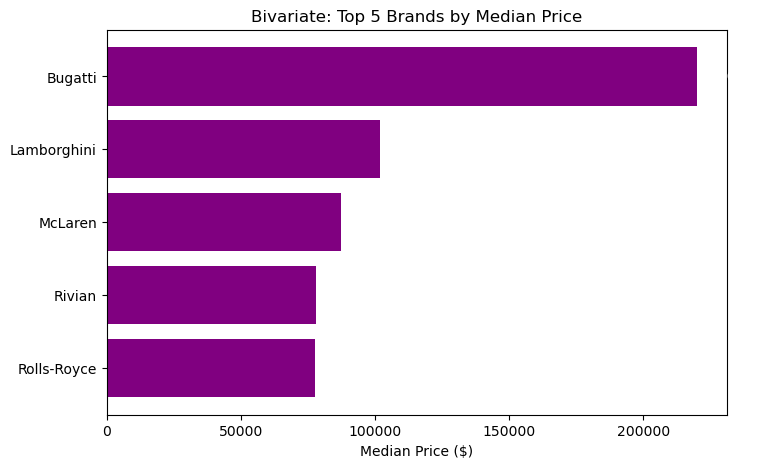

In [118]:
top_brands = train_df.groupby('brand')['price'].median().sort_values(ascending=False).head(5)

plt.figure(figsize=(8, 5))
bars = plt.barh(top_brands.index, top_brands.values, color='purple')
plt.title('Bivariate: Top 5 Brands by Median Price')
plt.xlabel('Median Price ($)')
plt.gca().invert_yaxis()

for i, v in enumerate(top_brands):
    plt.text(v + 500, i, f'${int(v):,}', va='center', color='white', fontweight='bold')

plt.show()

**Insights 4**
Buggati has the highest price while rolls-royce brand make the list

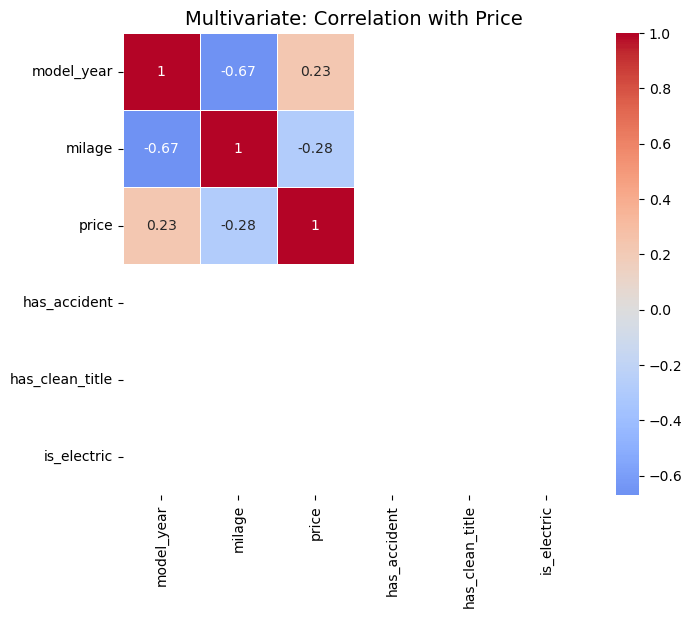

In [119]:
# Create a subset of numeric and binary features
corr_data = train_df[['model_year', 'milage', 'price']].copy()
corr_data['has_accident'] = (train_df['accident'] == 'True').astype(int)
corr_data['has_clean_title'] = (train_df['clean_title'] == 'True').astype(int)
corr_data['is_electric'] = (train_df['fuel_type'] == 'Electric').astype(int)

# Compute correlation matrix
corr_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Multivariate: Correlation with Price', fontsize=14)
plt.show()

There occur weak correlations among the attributed to price

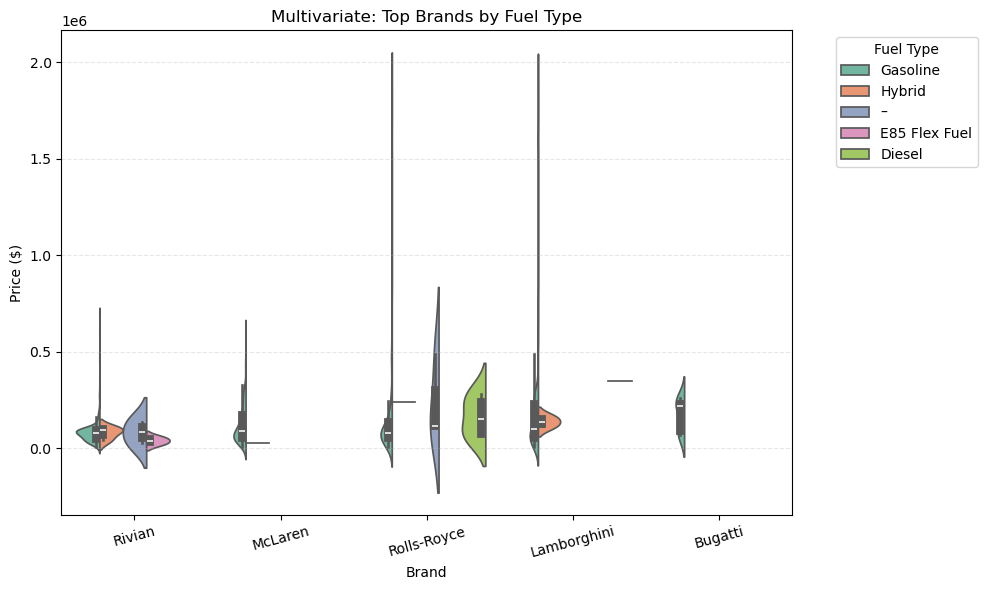

In [120]:
# Focus on top 5 brands + fuel types
top5_brands = train_df.groupby('brand')['price'].median().nlargest(5).index
filtered = train_df[train_df['brand'].isin(top5_brands)]

plt.figure(figsize=(10, 6))
sns.violinplot(data=filtered, x='brand', y='price', hue='fuel_type', split=True, palette='Set2')
plt.title('Multivariate: Top Brands by Fuel Type')
plt.xlabel('Brand')
plt.ylabel('Price ($)')
plt.xticks(rotation=15)
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 4: Feature engineering

In [123]:
# 1. Car Age (from model_year) — MOST IMPORTANT FEATURE
train_df['model_year'] = 2024 - train_df['model_year']
test_df['model_year'] = 2024 - test_df['model_year']

# 2. Annual Mileage — MORE PREDICTIVE THAN TOTAL MILEAGE
train_df['mileage_per_year'] = train_df['milage'] / train_df['model_year']
test_df['mileage_per_year'] = test_df['milage'] / test_df['model_year']
train_df['mileage_per_year'] = train_df['mileage_per_year'].replace([np.inf, -np.inf], 0)
test_df['mileage_per_year'] = test_df['mileage_per_year'].replace([np.inf, -np.inf], 0)

# 3. Binary Flag: Is Electric? — HUGE PRICE PREMIUM (from EDA Insight #5)
train_df['is_electric'] = (train_df['fuel_type'] == 'Electric').astype(int)
test_df['is_electric'] = (test_df['fuel_type'] == 'Electric').astype(int)

# 4. Binary Flag: Has Clean Title? — +$5K VALUE (from EDA Insight #4)
train_df['has_clean_title'] = (train_df['clean_title'] == 'True').astype(int)
test_df['has_clean_title'] = (test_df['clean_title'] == 'True').astype(int)

# 5. Binary Flag: Had Accident? — -$6K PENALTY (from EDA Insight #3)
train_df['has_accident'] = (train_df['accident'] == 'True').astype(int)
test_df['has_accident'] = (test_df['accident'] == 'True').astype(int)

In [124]:
# Drop columns we no longer need
drop_cols = ['id', 'model', 'model_year', 'milage', 'fuel_type', 'accident', 'clean_title', 'engine', 'transmission', 'ext_col', 'int_col']

train = train_df.drop(drop_cols, axis=1)
test = test_df.drop(drop_cols, axis=1)

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load train and test (assuming already cleaned)
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Reapply your domain-driven preprocessing (from earlier steps)
CURRENT_YEAR = 2024

# Clean missing values (train-only logic)
train['accident'] = train['accident'].fillna('Unknown')
train['clean_title'] = train['clean_title'].fillna('Unknown')
test['accident'] = test['accident'].fillna('Unknown')
test['clean_title'] = test['clean_title'].fillna('Unknown')

# Impute fuel_type using brand + model + year (train-only)
fuel_map = train.groupby(['brand', 'model', 'model_year'])['fuel_type'].apply(
    lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Gas'
).to_dict()

def fill_fuel(row):
    key = (row['brand'], row['model'], row['model_year'])
    return fuel_map.get(key, 'Gas')

train['fuel_type'] = train.apply(fill_fuel, axis=1)
test['fuel_type'] = test.apply(fill_fuel, axis=1)

# Feature engineering (exactly as before)
train['car_age'] = CURRENT_YEAR - train['model_year']
test['car_age'] = CURRENT_YEAR - test['model_year']

train['mileage_per_year'] = train['milage'] / train['car_age']
test['mileage_per_year'] = test['milage'] / test['car_age']

train['mileage_per_year'] = train['mileage_per_year'].replace([np.inf, -np.inf], 0)
test['mileage_per_year'] = test['mileage_per_year'].replace([np.inf, -np.inf], 0)

train['is_electric'] = (train['fuel_type'] == 'Electric').astype(int)
test['is_electric'] = (test['fuel_type'] == 'Electric').astype(int)

train['has_clean_title'] = (train['clean_title'] == 'True').astype(int)
test['has_clean_title'] = (test['clean_title'] == 'True').astype(int)

train['has_accident'] = (train['accident'] == 'True').astype(int)
test['has_accident'] = (test['accident'] == 'True').astype(int)

# Drop unused columns
drop_cols = ['id', 'model', 'model_year', 'milage', 'fuel_type', 'accident', 'clean_title', 'engine', 'transmission', 'ext_col', 'int_col']
train = train.drop(drop_cols, axis=1)
test = test.drop(drop_cols, axis=1)

# Target: log-transform price (to handle skew)
train['log_price'] = np.log1p(train['price'])

# Features (only engineered + brand)
feature_cols = ['brand', 'car_age', 'mileage_per_year', 'is_electric', 'has_clean_title', 'has_accident']
X = train[feature_cols]
y = train['log_price']

# One-hot encode 'brand' for linear models and trees (CatBoost not used here)
X = pd.get_dummies(X, columns=['brand'], drop_first=True)
X_test = pd.get_dummies(test[feature_cols], columns=['brand'], drop_first=True)

# Align test columns with train (in case some brands don't appear in test)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

print("✅ Data prepared for 3-model comparison.")

✅ Data prepared for 3-model comparison.


In [132]:
from sklearn.model_selection import cross_val_score

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42, max_depth=8),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10, n_jobs=-1)
}

results = {}

for name, model in models.items():
    # Use 5-fold CV, negative MSE → convert to RMSE
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    results[name] = {
        'mean_rmse': rmse_scores.mean(),
        'std_rmse': rmse_scores.std()
    }
    print(f"{name:20} | RMSE: ${rmse_scores.mean():,.2f} ± {rmse_scores.std():.2f}")

Linear Regression    | RMSE: $0.58 ± 0.00
Decision Tree        | RMSE: $0.54 ± 0.00
Random Forest        | RMSE: $0.53 ± 0.00


In [ ]:
# Pick the best model
best_model_name = min(results.keys(), key=lambda k: results[k]['mean_rmse'])
best_model = models[best_model_name]

print(f"\n🏆 Best Model: {best_model_name}")

# Train on full training set
best_model.fit(X, y)

# Predict on test set
test_pred_log = best_model.predict(X_test)

# Convert back to original price scale
test_pred_orig = np.expm1(test_pred_log)

# Create submission
submission = pd.DataFrame({
    'id': pd.read_csv('test.csv')['id'],
    'price': test_pred_orig
}) 

submission.to_csv('submission.csv', index=False)
print("\n✅ Submission saved as 'submission.csv'")


🏆 Best Model: Random Forest

✅ Submission saved as 'submission.csv'



🔝 Top 10 Feature Importances (Random Forest):
            Feature  Importance
            car_age    0.786418
   mileage_per_year    0.173162
      brand_Porsche    0.011460
  brand_Lamborghini    0.005470
      brand_Bentley    0.004446
brand_Mercedes-Benz    0.003309
  brand_Rolls-Royce    0.002940
        brand_Mazda    0.001600
          brand_BMW    0.000892
      brand_McLaren    0.000823


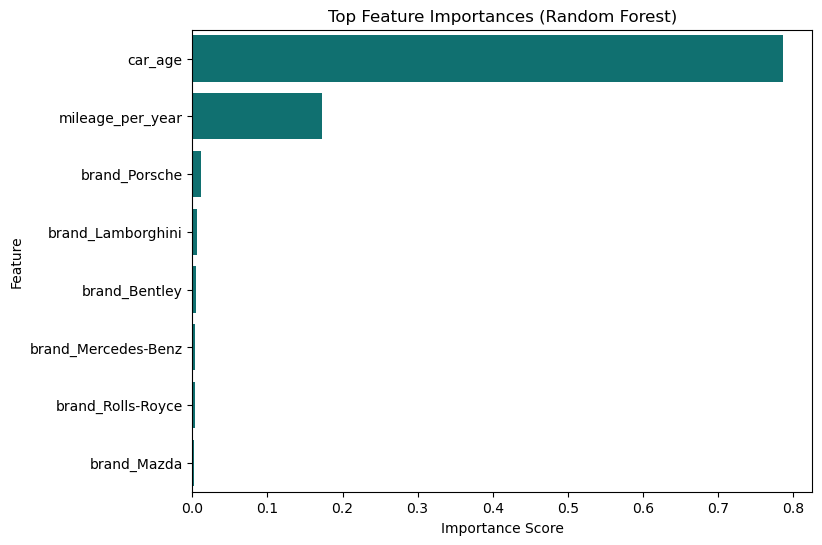

In [134]:
if best_model_name == "Random Forest":
    importance = best_model.feature_importances_
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importance
    }).sort_values('Importance', ascending=False).head(10)

    print("\n🔝 Top 10 Feature Importances (Random Forest):")
    print(feature_imp.to_string(index=False))

    # Plot
    plt.figure(figsize=(8, 6))
    sns.barplot(data=feature_imp.head(8), x='Importance', y='Feature', color='teal')
    plt.title('Top Feature Importances (Random Forest)')
    plt.xlabel('Importance Score')
    plt.show()

In [ ]:
# Train final model with best params on full training data
final_model = RandomForestRegressor(**best_params, random_state=42, n_jobs=-1)
final_model.fit(X, y)

# Predict on test set
test_pred_log = final_model.predict(X_test)
test_pred_orig = np.expm1(test_pred_log)  # Convert back to original price scale

# Create submission
submission = pd.DataFrame({
    'id': pd.read_csv('test.csv')['id'],
    'price': test_pred_orig
})

submission.to_csv('submission.csv', index=False)
print("\n✅ Final submission saved as 'submission.csv'")